In [1]:
import cv2
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import skimage.filters as sk
from skimage.morphology import disk, binary_opening, square, watershed
from skimage.feature import peak_local_max
from skimage import *
from scipy import ndimage


In [2]:
capture = cv2.VideoCapture('stab_vid.avi')
frames = []
ret, frame = capture.read()
frames.append(frame)
while ret:
    ret, frame = capture.read()
    frames.append(frame)

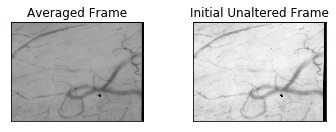

In [3]:
image = cv2.addWeighted(frames[0], 0.2, frames[1], 0.2, 0)
image = cv2.addWeighted(image, 0.8, frames[2], 0.2, 0)
image = cv2.addWeighted(image, 0.8, frames[3], 0.2, 0)
image = cv2.addWeighted(image, 0.8, frames[4], 0.2, 0)


plt.subplot(2,2,1)
plt.imshow(image, cmap='gray')
plt.title('Averaged Frame')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(frames[0])
plt.title('Initial Unaltered Frame')
plt.xticks([])
plt.yticks([])

plt.show()

# Apply Clahe Filters

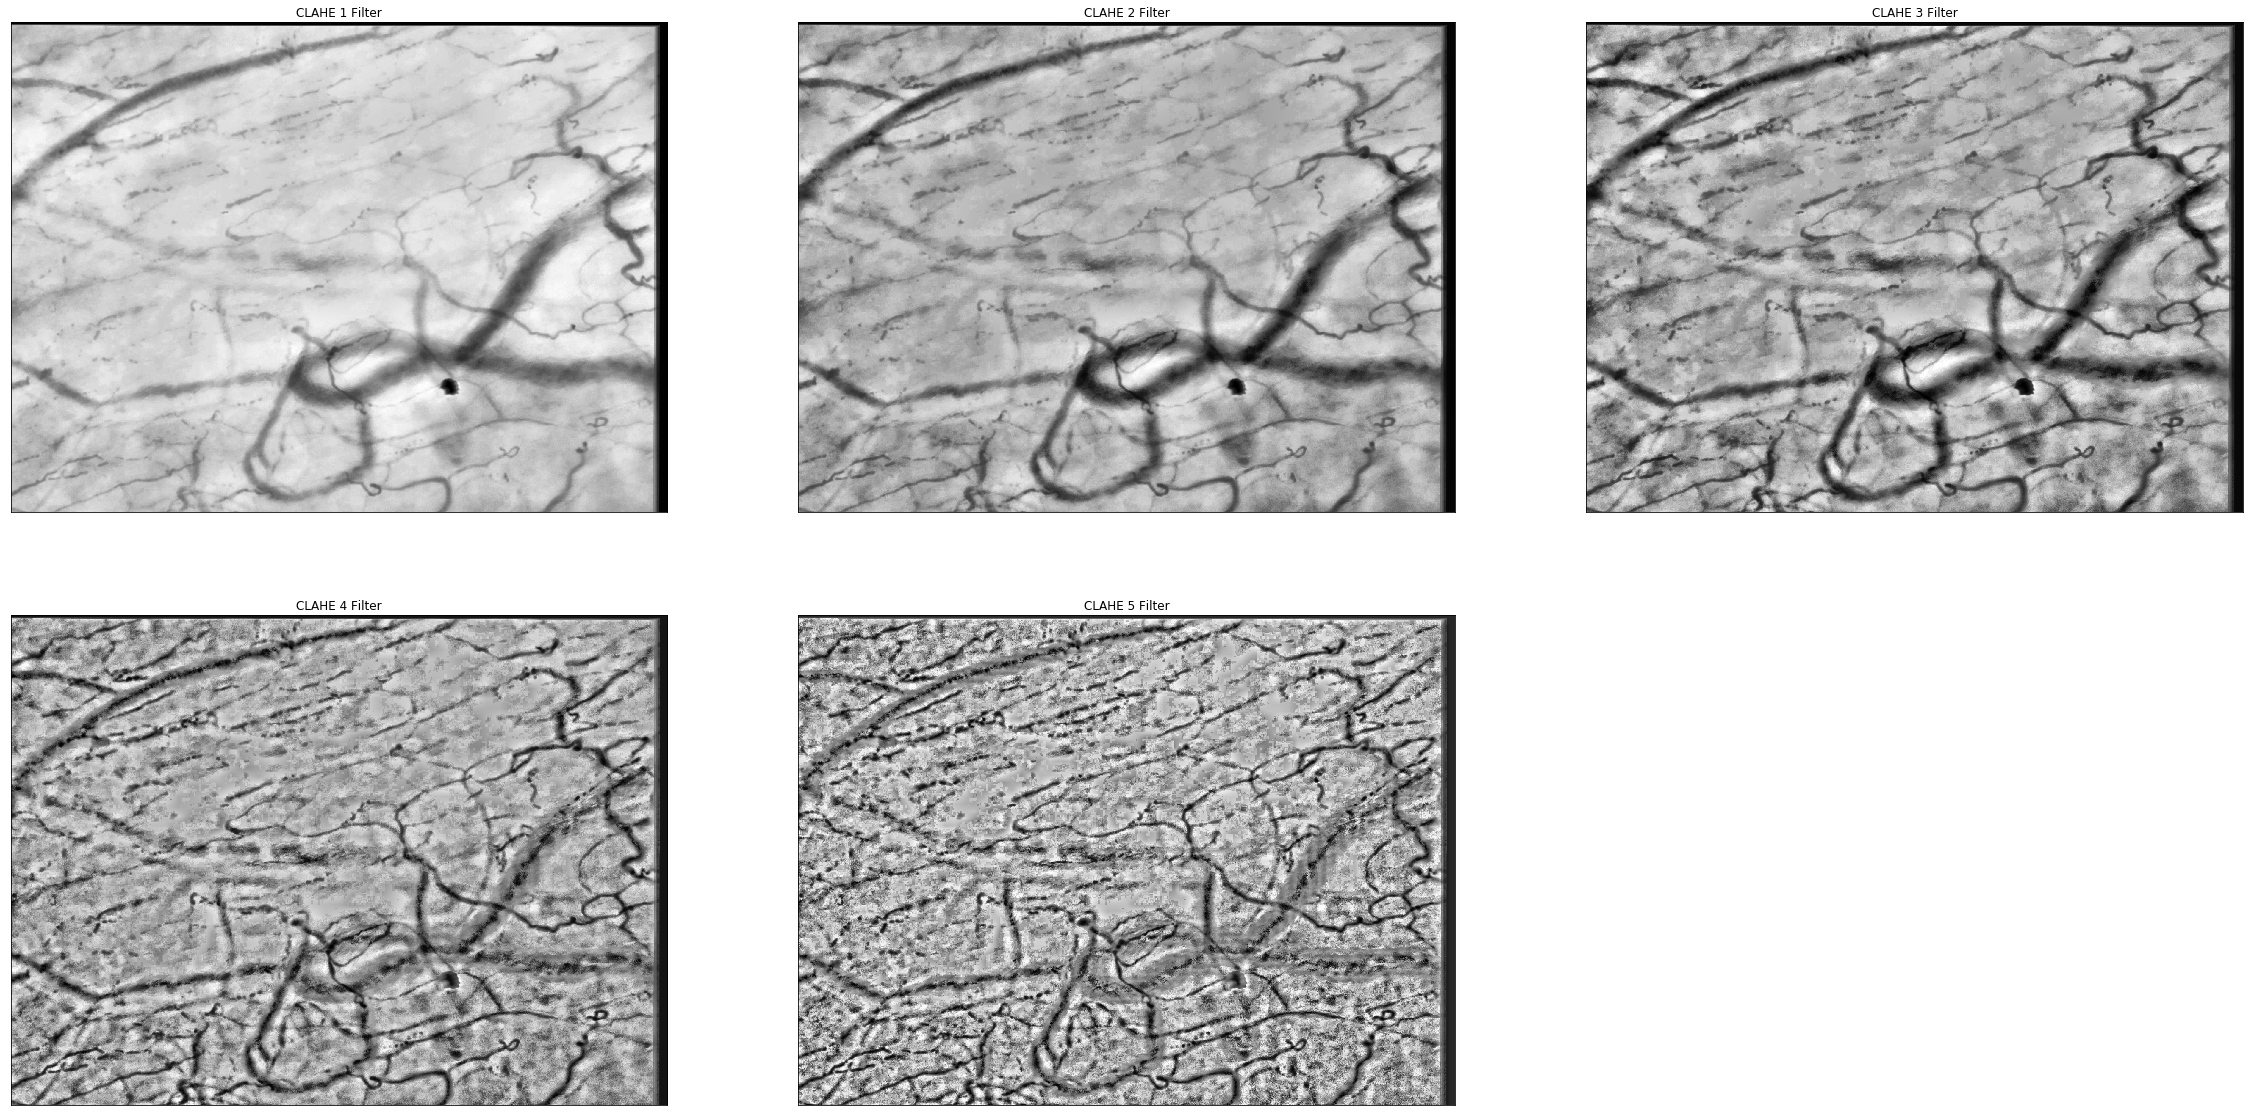

In [4]:
flat_image = image[:,:,2]

clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(15,15))
clahe3 = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20,20))
clahe4 = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(50,50))
clahe5 = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(70,70))

new_image1 = clahe1.apply(flat_image)
new_image2 = clahe2.apply(flat_image)
new_image3 = clahe3.apply(flat_image)
new_image4 = clahe4.apply(flat_image)
new_image5 = clahe5.apply(flat_image)

plt.figure(figsize=(40,20))
plt.subplot(2,3,1)
plt.imshow(new_image1, cmap='gray')
plt.title('CLAHE 1 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,2)
plt.imshow(new_image2, cmap='gray')
plt.title('CLAHE 2 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(new_image3, cmap='gray')
plt.title('CLAHE 3 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,4)
plt.imshow(new_image4, cmap='gray')
plt.title('CLAHE 4 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,5)
plt.imshow(new_image5, cmap='gray')
plt.title('CLAHE 5 Filter')
plt.xticks([])
plt.yticks([])

plt.show()

# Apply Median Filter

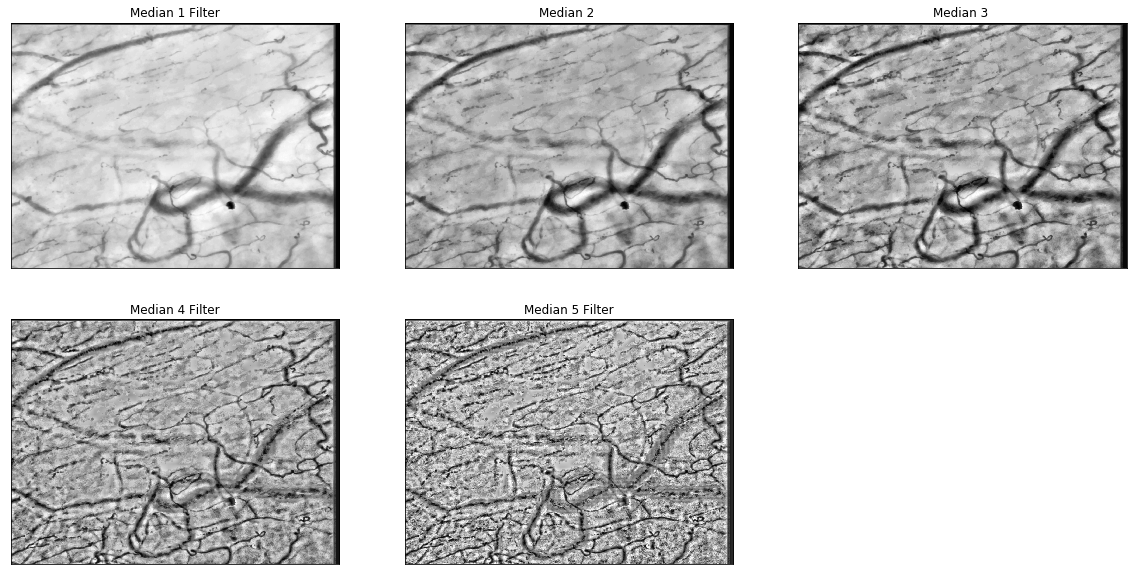

In [5]:
median_image1 = filters.median(new_image1, disk(5))
median_image2 = filters.median(new_image2, disk(4))
median_image3 = filters.median(new_image3, disk(3))
median_image4 = filters.median(new_image4, disk(2))
median_image5 = filters.median(new_image5, disk(1))

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(median_image1, cmap='gray')
plt.title('Median 1 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,2)
plt.imshow(median_image2, cmap='gray')
plt.title('Median 2 ')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(median_image3, cmap='gray')
plt.title('Median 3 ')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,4)
plt.imshow(median_image4, cmap='gray')
plt.title('Median 4 Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,5)
plt.imshow(median_image5, cmap='gray')
plt.title('Median 5 Filter')
plt.xticks([])
plt.yticks([])

plt.show()

# Apply Thresholding

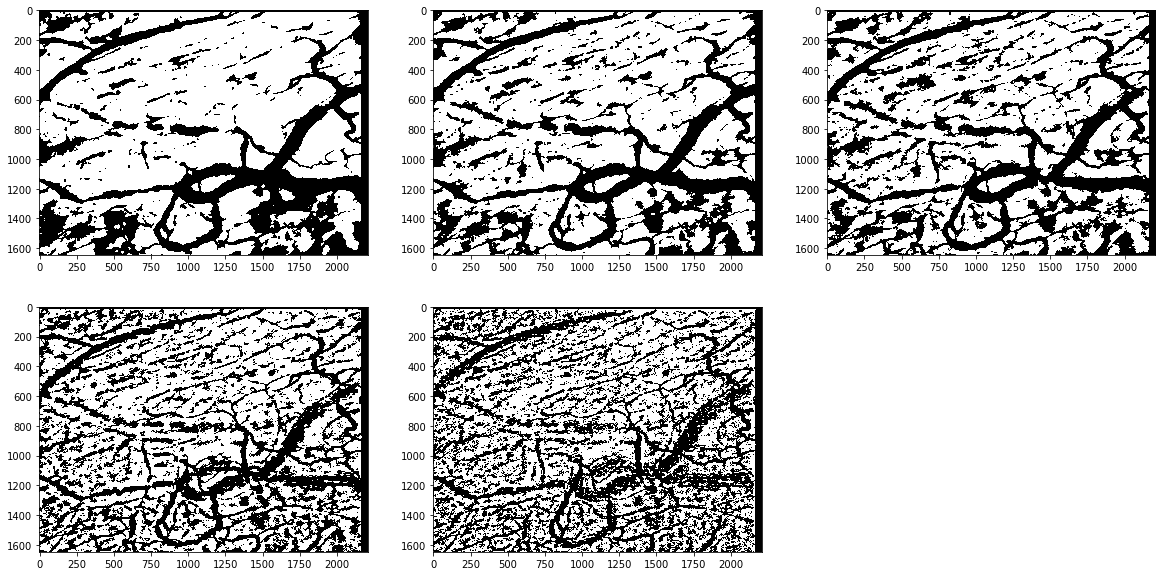

In [6]:
threshhold = sk.threshold_mean(median_image1)
threshhold1 = median_image1 > threshhold

threshhold = sk.threshold_mean(median_image2)
threshhold2 = median_image2 > threshhold

threshhold = sk.threshold_mean(median_image3)
threshhold3 = median_image3 > threshhold

threshhold = sk.threshold_mean(median_image4)
threshhold4 = median_image4 > threshhold

threshhold = sk.threshold_mean(median_image5)
threshhold5 = median_image5 > threshhold

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(threshhold1, cmap='gray')

plt.subplot(2,3,2)
plt.imshow(threshhold2, cmap='gray')

plt.subplot(2,3,3)
plt.imshow(threshhold3, cmap='gray')

plt.subplot(2,3,4)
plt.imshow(threshhold4, cmap='gray')

plt.subplot(2,3,5)
plt.imshow(threshhold5, cmap='gray')

plt.show()

# Apply Morphological Opening

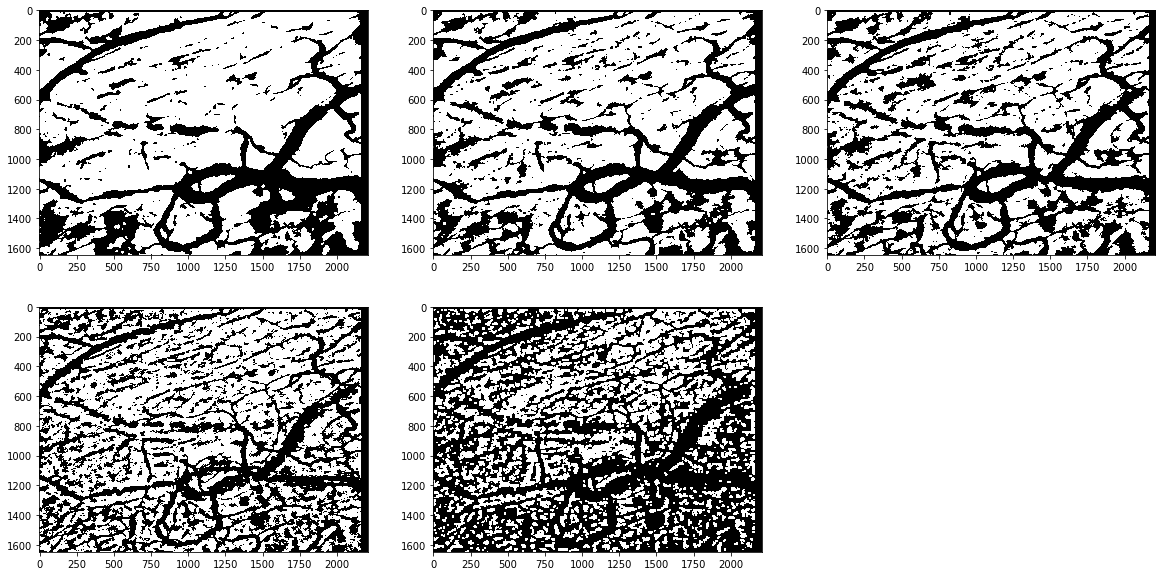

In [7]:
opened_image1 = binary_opening(threshhold1, square(5))
opened_image2 = binary_opening(threshhold2, square(5))
opened_image3 = binary_opening(threshhold3, square(5))
opened_image4 = binary_opening(threshhold4, square(5))
opened_image5 = binary_opening(threshhold5, square(10))

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(opened_image1, cmap='gray')

plt.subplot(2,3,2)
plt.imshow(opened_image2, cmap='gray')

plt.subplot(2,3,3)
plt.imshow(opened_image3, cmap='gray')

plt.subplot(2,3,4)
plt.imshow(opened_image4, cmap='gray')

plt.subplot(2,3,5)
plt.imshow(opened_image5, cmap='gray')

plt.show()

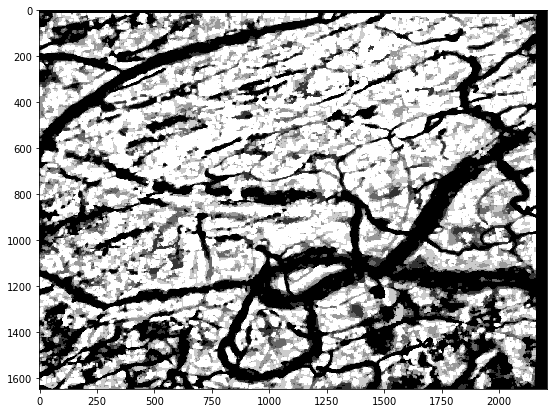

In [39]:
add_opening = cv2.add(opened_image1.astype(np.uint8), opened_image2.astype(np.uint8))
add_opening = cv2.add(add_opening, opened_image3.astype(np.uint8))
add_opening = cv2.add(add_opening, opened_image4.astype(np.uint8))
add_opening = cv2.add(add_opening, opened_image5.astype(np.uint8))

plt.figure(figsize=(20,10))
plt.xticks([])
plt.yticks([])
plt.set_cmap('gray')

plt.subplot(1,2,1)
plt.imshow(add_opening)


plt.show()

In [8]:

threshhold5 = threshhold5.astype(np.uint8)


In [12]:
D = ndimage.distance_transform_edt(threshhold5)
localMax = peak_local_max(D, indices=False, min_distance=5,labels=threshhold5)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(D, markers, mask=threshhold5)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 8515 unique segments found


In [13]:
mask = np.zeros(threshhold2.shape, dtype="uint8")
for label in np.unique(labels):
    if label == 0:
        continue
    mask[labels == label] = 255
    


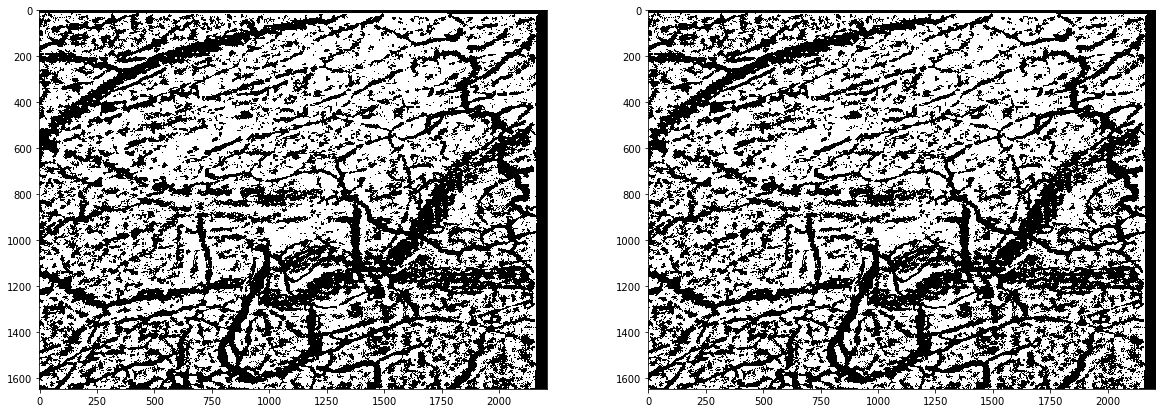

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(threshhold5, cmap='gray')

plt.show()